In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords") 
from nltk.stem.wordnet import WordNetLemmatizer


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to /home/ines/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:


df = pd.read_csv("Sheet_1.csv")

In [3]:
df

,response_id,class,response_text,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,response_1,not_flagged,I try and avoid this sort of conflict,NaN,NaN,NaN,NaN,NaN
1,response_2,flagged,Had a friend open up to me about his mental ad...,NaN,NaN,NaN,NaN,NaN
2,response_3,flagged,I saved a girl from suicide once. She was goin...,NaN,NaN,NaN,NaN,NaN
3,response_4,not_flagged,i cant think of one really...i think i may hav...,NaN,NaN,NaN,NaN,NaN
4,response_5,not_flagged,Only really one friend who doesn't fit into th...,,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
75,response_76,not_flagged,"Now that I've been through it, although i'm no...",NaN,NaN,NaN,NaN,NaN
76,response_77,flagged,when my best friends mom past away from od'ing...,NaN,NaN,NaN,NaN,NaN
77,response_78,not_flagged,As a camp counselor I provide stability in kid...,NaN,NaN,NaN,NaN,NaN
78,response_79,flagged,My now girlfriend used to have serious addicti...,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   response_id    80 non-null     object 
 1   class          80 non-null     object 
 2   response_text  80 non-null     object 
 3   Unnamed: 3     2 non-null      object 
 4   Unnamed: 4     0 non-null      float64
 5   Unnamed: 5     1 non-null      object 
 6   Unnamed: 6     0 non-null      float64
 7   Unnamed: 7     1 non-null      object 
dtypes: float64(2), object(6)
memory usage: 5.1+ KB


In [5]:
df.isnull().sum()

response_id       0
class             0
response_text     0
Unnamed: 3       78
Unnamed: 4       80
Unnamed: 5       79
Unnamed: 6       80
Unnamed: 7       79
dtype: int64

# Preprocessing

In [6]:
df = df[['class', 'response_text']]

In [7]:
df

,class,response_text
0,not_flagged,I try and avoid this sort of conflict
1,flagged,Had a friend open up to me about his mental ad...
2,flagged,I saved a girl from suicide once. She was goin...
3,not_flagged,i cant think of one really...i think i may hav...
4,not_flagged,Only really one friend who doesn't fit into th...
...,...,...
75,not_flagged,"Now that I've been through it, although i'm no..."
76,flagged,when my best friends mom past away from od'ing...
77,not_flagged,As a camp counselor I provide stability in kid...
78,flagged,My now girlfriend used to have serious addicti...


In [8]:
df.isnull().sum()

class            0
response_text    0
dtype: int64

In [9]:
df['class']=df.loc[:, 'class'].map({'not_flagged':0, 'flagged':1})
df

/tmp/ipykernel_7356/2744607311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class']=df.loc[:, 'class'].map({'not_flagged':0, 'flagged':1})


,class,response_text
0,0,I try and avoid this sort of conflict
1,1,Had a friend open up to me about his mental ad...
2,1,I saved a girl from suicide once. She was goin...
3,0,i cant think of one really...i think i may hav...
4,0,Only really one friend who doesn't fit into th...
...,...,...
75,0,"Now that I've been through it, although i'm no..."
76,1,when my best friends mom past away from od'ing...
77,0,As a camp counselor I provide stability in kid...
78,1,My now girlfriend used to have serious addicti...


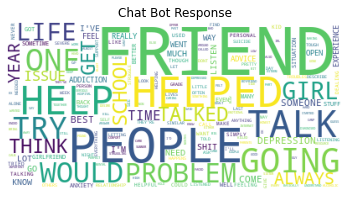

In [10]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

def cloud(text):
    wordcloud = WordCloud(background_color="white",stopwords=stop).generate(" ".join([i for i in text.str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Chat Bot Response")
cloud(df['response_text'])


# NLP

## re

In [11]:


first_text = df.response_text[4]
text = re.sub("[^a-zA-Z]"," ",first_text)
text = text.lower() 
print(text)



only really one friend who doesn t fit into the any of the above categories  her therapist calls it spiraling   anyway she pretty much calls me any time she is frustrated by something with  her boyfriend to ask me if it s logical or not  before they would just fight and he would call her crazy  now she asks me if it s ok he didn t say  please  when he said   hand me the remote  


In [12]:
#irrelevant stop words
text = nltk.word_tokenize(text)
text = [ word for word in text if not word in set(stopwords.words("english"))]
print(text)

['really', 'one', 'friend', 'fit', 'categories', 'therapist', 'calls', 'spiraling', 'anyway', 'pretty', 'much', 'calls', 'time', 'frustrated', 'something', 'boyfriend', 'ask', 'logical', 'would', 'fight', 'would', 'call', 'crazy', 'asks', 'ok', 'say', 'please', 'said', 'hand', 'remote']


## Lemmatization

In [13]:
lemmatizer = WordNetLemmatizer()
text = [(lemmatizer.lemmatize(lemmatizer.lemmatize(lemmatizer.lemmatize(word, "n"),pos = "v"),pos="a")) for word in text]
print(text)



['really', 'one', 'friend', 'fit', 'category', 'therapist', 'call', 'spiral', 'anyway', 'pretty', 'much', 'call', 'time', 'frustrate', 'something', 'boyfriend', 'ask', 'logical', 'would', 'fight', 'would', 'call', 'crazy', 'ask', 'ok', 'say', 'please', 'say', 'hand', 'remote']


In [14]:
# all words

description_list = []
for description in df.response_text:
       
    description = re.sub("[^a-zA-Z]"," ",description)
    description = description.lower() 
    
    description = nltk.word_tokenize(description)
    description = [ word for word in description if not word in set(stopwords.words("english"))]
    
    lemmatizer = WordNetLemmatizer()
    description = (lemmatizer.lemmatize(lemmatizer.lemmatize(lemmatizer.lemmatize(word, "n"),pos = "v"),pos="a") for word in description)
    
    description = " ".join(description)
    description_list.append(description)

In [15]:


description_list[4]

'really one friend fit category therapist call spiral anyway pretty much call time frustrate something boyfriend ask logical would fight would call crazy ask ok say please say hand remote'

## bag of words

a simplifying representation used in natural language processing and information retrieval (IR)

In [16]:
max_features = 100
count_vectorizer = CountVectorizer(max_features=max_features)
sparce_matrix = count_vectorizer.fit_transform(description_list).toarray()
print("Top {} Most Used Words: {}".format(max_features,count_vectorizer.get_feature_names()))

Top 100 Most Used Words: ['addiction', 'advice', 'alone', 'always', 'anxiety', 'anything', 'back', 'best', 'bring', 'call', 'care', 'come', 'comfort', 'could', 'deal', 'depression', 'describe', 'dont', 'end', 'even', 'everything', 'experience', 'face', 'feel', 'find', 'friend', 'get', 'gf', 'girl', 'girlfriend', 'give', 'go', 'good', 'grade', 'happen', 'help', 'helpful', 'issue', 'kid', 'kill', 'know', 'last', 'let', 'life', 'like', 'listen', 'little', 'look', 'lot', 'make', 'many', 'may', 'much', 'need', 'never', 'night', 'offer', 'often', 'one', 'open', 'others', 'people', 'person', 'personal', 'pretty', 'problem', 'really', 'relationship', 'say', 'school', 'see', 'self', 'severe', 'share', 'shit', 'similar', 'simply', 'situation', 'someone', 'sometimes', 'start', 'struggle', 'stuff', 'suicide', 'support', 'talk', 'tell', 'think', 'though', 'time', 'trouble', 'try', 'use', 'want', 'way', 'week', 'well', 'work', 'would', 'year']


/home/ines/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



## naive bayes

In [17]:
y = df.iloc[:,0].values
x = sparce_matrix

In [18]:


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)



In [25]:
from sklearn import metrics

nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)

print(metrics.accuracy_score(y_pred,y_test))




0.75
